<a href="https://colab.research.google.com/github/rogeriothur/data_science_studies/blob/main/An%C3%A1lise_de_sentimentos_tweets_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Sentimentos** tweets covid

In [172]:
## Contextualização do problema
Neste problema, o objetivo é classificar qual o sentimento a partir do tweet.


> OBJETIVO: Criar um modelo que classifique o sentimento a partir de um tweet

Espera-se que o modelo seja capaz de classificar o sentimento (positivo, neutro e negativo)



SyntaxError: ignored

## Importando bibliotecas necessárias

In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

from string import punctuation
import re
from wordcloud import WordCloud

import nltk
from nltk.tokenize import TweetTokenizer
from nltk import tokenize
from nltk.corpus import stopwords

In [168]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Obtenção dos dados

In [3]:
df = pd.read_csv('covid_tweets.csv', encoding='latin-1')

## Análise de dados

**Dicionário das variáveis**

* `UserName` - nome do usuário
* `ScreenName` - 
* `Location` - localização
* `Tweet At` - data
* `Original Tweet` - tweet (texto)
* `Label` - qual o sentimento


In [4]:
def eda(df):
    """
    Gera uma dataframe com informações relevantes sobre o mesmo.
    Generates a dataframe with relevant information about it
    
    :param df: pd.DataFrame para ser realizada a exploração
    :param df: pd.DataFrameto be explored
    """
    
    explorar = pd.DataFrame({
        'tipo' : df.dtypes,
        'quantidade_nula' : df.isnull().sum()
    })
    
    explorar['porcentagem_nula'] = np.round((explorar.quantidade_nula / df.shape[0]) * 100, 4)
    
    display(f'Entradas: {df.shape[0]}')
    display(f'Variáveis: {df.shape[1]}')
    
    return explorar.sort_values(by='quantidade_nula', ascending=False)

In [5]:
eda(df)

'Entradas: 41157'

'Variáveis: 6'

,tipo,quantidade_nula,porcentagem_nula
Location,object,8590,20.8713
UserName,int64,0,0.0000
ScreenName,int64,0,0.0000
TweetAt,object,0,0.0000
OriginalTweet,object,0,0.0000
Sentiment,object,0,0.0000


In [6]:
# Removendo colunas que não agregam para o contexto
df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'], inplace=True)

In [7]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

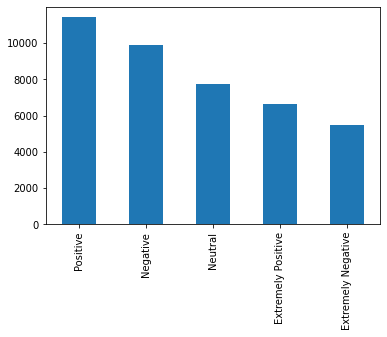

In [8]:
df.Sentiment.value_counts().plot(kind='bar')

In [9]:
df_base = df.copy()

In [10]:
df_base.Sentiment = df_base.Sentiment.map({'Extremely Negative': 0,
                                            'Negative': 1,
                                            'Neutral': 2,
                                            'Positive': 3,
                                            'Extremely Positive': 4})

## Criar modelo de baseline

In [99]:
cv = CountVectorizer(lowercase=True,
                     encoding='latin-1',
                     analyzer='word',
                     max_features=1000)

bag_words = cv.fit_transform(df_base.OriginalTweet)

In [100]:
# Separando variável alvo
X = bag_words
y = df_base.Sentiment

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=22,
                                                    test_size=0.3,
                                                    stratify=y)

In [102]:
reg = LogisticRegression(solver='lbfgs',
                         max_iter=1000,
                         random_state=22)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1645
           1       0.55      0.53      0.54      2975
           2       0.65      0.74      0.69      2314
           3       0.58      0.59      0.58      3427
           4       0.69      0.64      0.67      1987

    accuracy                           0.61     12348
   macro avg       0.62      0.61      0.62     12348
weighted avg       0.61      0.61      0.61     12348



In [104]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1     2     3     4    All
Real                                        
0         946   546    59    69    25   1645
1         444  1572   382   510    67   2975
2          31   244  1712   302    25   2314
3          70   462   423  2024   448   3427
4          15    48    55   597  1272   1987
All      1506  2872  2631  3502  1837  12348


## 1º Modelo
- Reduzindo número de classes

In [106]:
df_1 = df.copy()

In [107]:
df_1.Sentiment = df_1.Sentiment.map({'Extremely Negative': 0,
                                     'Negative': 0,
                                     'Neutral': 1,
                                     'Positive': 2,
                                     'Extremely Positive': 2})

In [108]:
cv = CountVectorizer(lowercase=True,
                     encoding='latin-1',
                     analyzer='word',
                     max_features=1000)

bag_words = cv.fit_transform(df_1.OriginalTweet)

In [109]:
X = bag_words
y = df_1.Sentiment

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=22,
                                                    test_size=0.3,
                                                    stratify=y)

In [111]:
reg = LogisticRegression(solver='lbfgs',
                         max_iter=1000,
                         random_state=22)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4620
           1       0.68      0.73      0.71      2314
           2       0.83      0.82      0.83      5414

    accuracy                           0.79     12348
   macro avg       0.77      0.78      0.78     12348
weighted avg       0.79      0.79      0.79     12348



In [113]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1     2    All
Real                            
0        3628   387   605   4620
1         298  1694   322   2314
2         552   404  4458   5414
All      4478  2485  5385  12348


### Funções úteis

In [25]:
def nuvem_positiva(df, coluna):
    df_positivo = df.query('Sentiment == 2')
    tweets_positivos = ' '.join([tweet for tweet in df_positivo[coluna]])

    nuvem_palavras = WordCloud(width=800,
                               height=500,
                               max_font_size=110,
                               collocations=False).generate(tweets_positivos)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def nuvem_negativa(df, coluna):
    df_negativo = df.query('Sentiment == 0')
    tweets_negativos = ' '.join([tweet for tweet in df_negativo[coluna]])

    nuvem_palavras = WordCloud(width=800,
                               height=500,
                               max_font_size=110,
                               collocations=False).generate(tweets_negativos)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [56]:
def token_mais_frequentes(df, coluna, quantidade):
    tweets_completo = ' '.join([tweet for tweet in df[coluna]])
    token_tweets = TweetTokenizer().tokenize(tweets_completo)

    frequencia = nltk.FreqDist(token_tweets)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                  'Frequencia': list(frequencia.values())
                                  })
    
    plt.figure(figsize=(15,8))
    plt.title('Palavras mais frequentes', fontsize=15)
    plt.xlabel('Palavra',fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    sns.barplot(data=df_frequencia.sort_values(by='Frequencia', ascending=False).head(quantidade),
                    x='Palavra',
                    y='Frequencia')

    plt.show()

def token_menos_frequentes(df, coluna, quantidade):
    tweets_completo = ' '.join([tweet for tweet in df[coluna]])
    token_tweets = TweetTokenizer().tokenize(tweets_completo)

    frequencia = nltk.FreqDist(token_tweets)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                  'Frequencia': list(frequencia.values())
                                  })
    
    plt.figure(figsize=(15,8))
    plt.title('Palavras mais frequentes', fontsize=15)
    plt.xlabel('Palavra',fontsize=18)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    sns.barplot(data=df_frequencia.sort_values(by='Frequencia', ascending=True).head(quantidade),
                    x='Palavra',
                    y='Frequencia')

    plt.show()

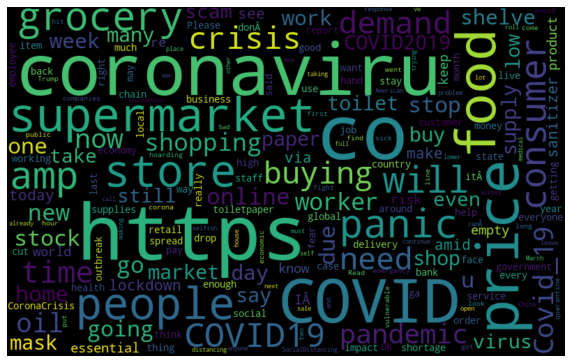

In [26]:
nuvem_negativa(df_1, 'OriginalTweet')

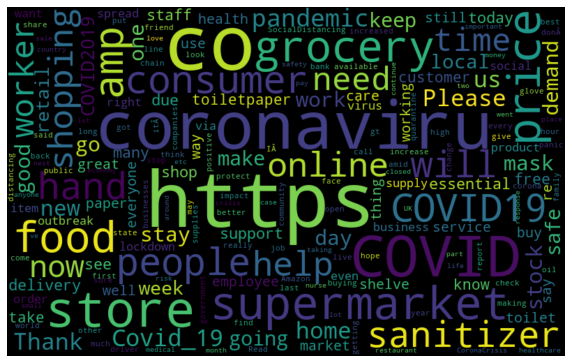

In [27]:
nuvem_positiva(df_1, 'OriginalTweet')

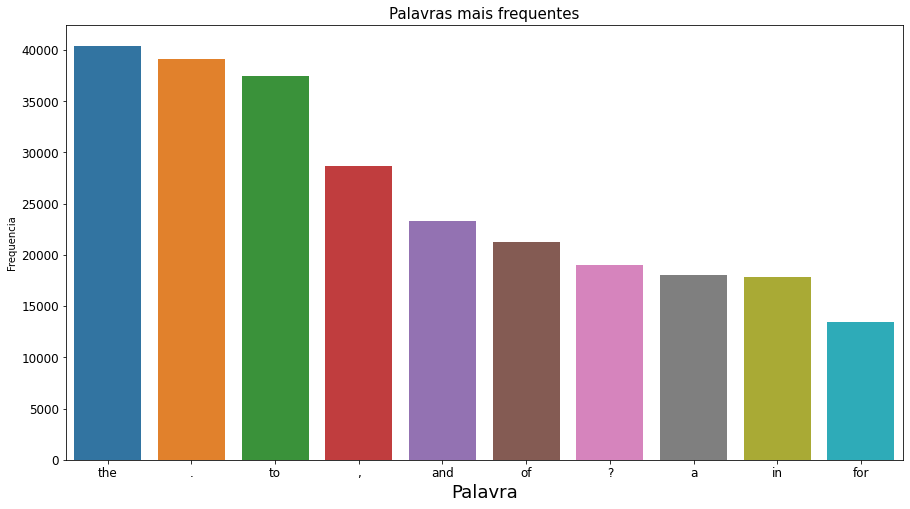

In [49]:
token_mais_frequentes(df_1, 'OriginalTweet', 10)

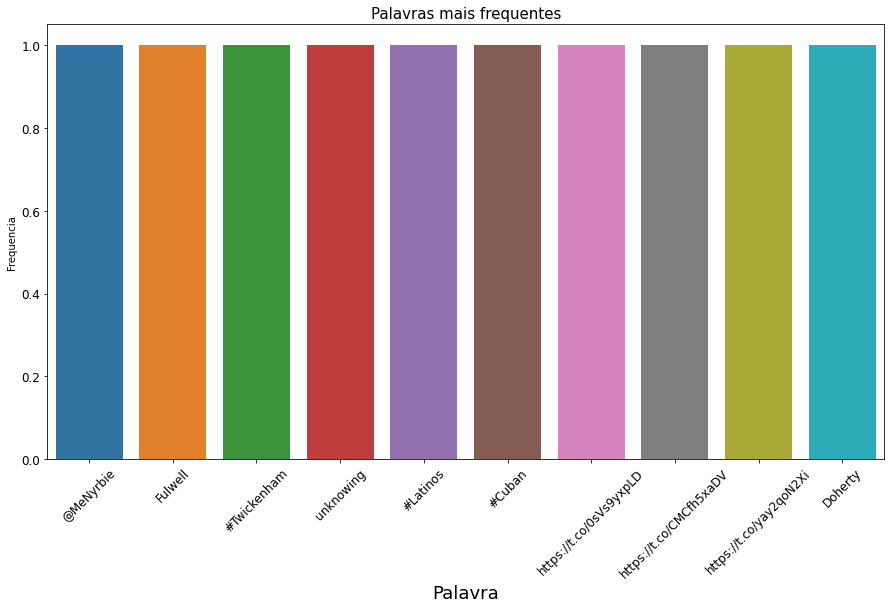

In [57]:
token_menos_frequentes(df_1, 'OriginalTweet', 10)

## 2º Modelo
- Aplicando TfidfTransformer: cria a frequência de cada plavra, transforma em uma matriz de contagem


In [114]:
df_2 = df.copy()

In [115]:
df_2.Sentiment = df_2.Sentiment.map({'Extremely Negative': 0,
                                     'Negative': 0,
                                     'Neutral': 1,
                                     'Positive': 2,
                                     'Extremely Positive': 2})

In [116]:
X = df_2.OriginalTweet
y = df_2.Sentiment

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=22,
                                                    test_size=0.3,
                                                    stratify=y)

- Parâmentro l2: consiste em dividir a contagem de cada termo numa entrada do dataset pela raiz quadrada da soma dos quadrados de cada termo

In [118]:
pipeline = Pipeline([
    ('cv', CountVectorizer(encoding='latin-1',
                            analyzer='word',
                           max_features=1000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='liblinear',
                                      penalty='l2',
                                      C=2)),
                     ])

In [119]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4620
           1       0.74      0.64      0.69      2314
           2       0.80      0.84      0.82      5414

    accuracy                           0.79     12348
   macro avg       0.78      0.76      0.77     12348
weighted avg       0.79      0.79      0.79     12348



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

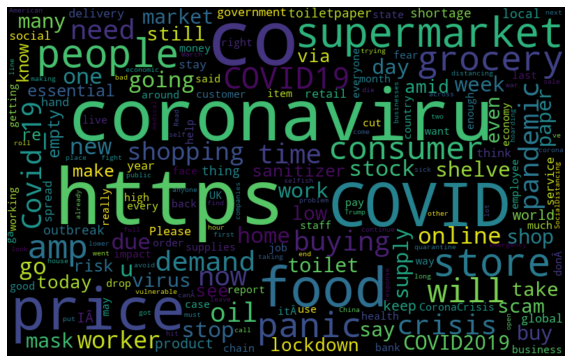

In [72]:
nuvem_negativa(df_2, 'OriginalTweet')

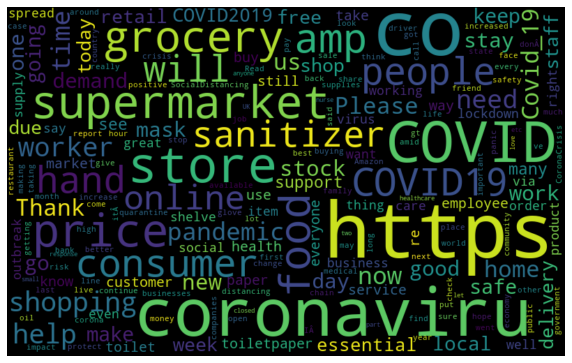

In [73]:
nuvem_positiva(df_2, 'OriginalTweet')

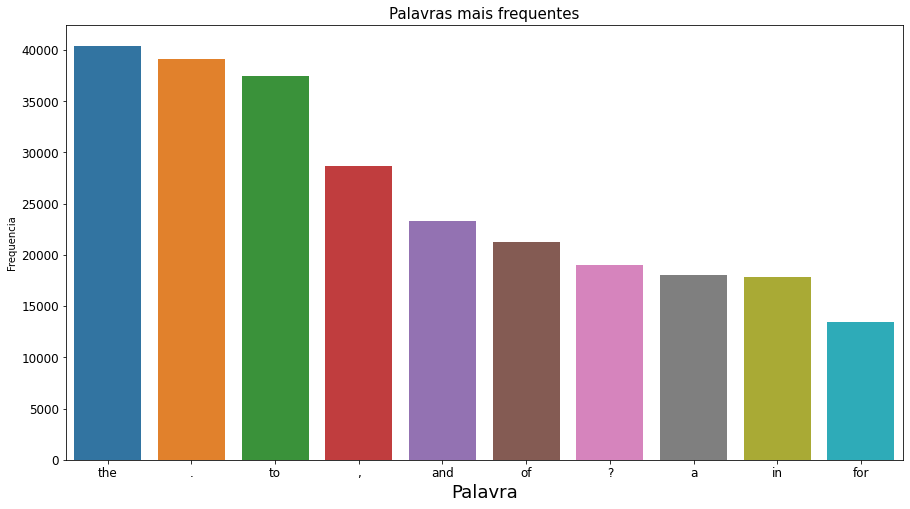

In [74]:
token_mais_frequentes(df_2, 'OriginalTweet', 10)

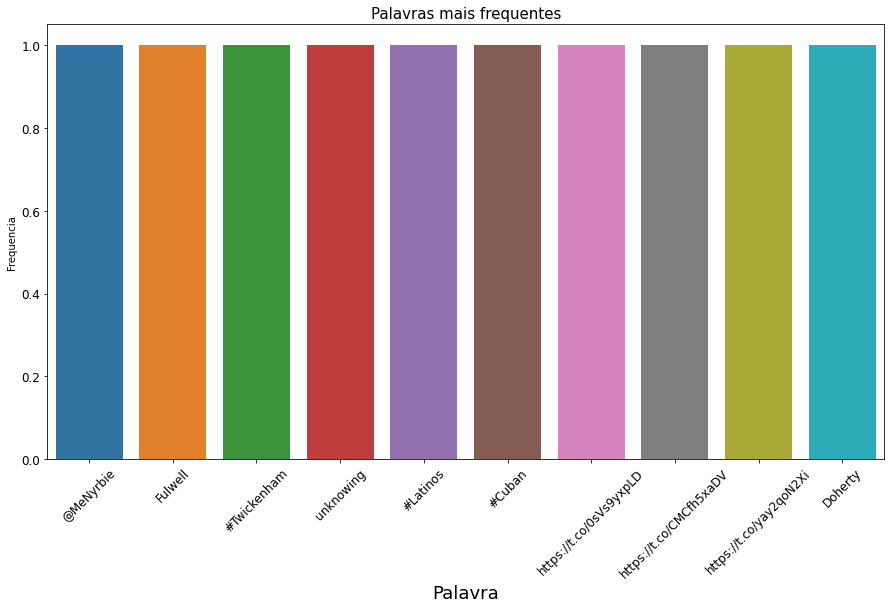

In [75]:
token_menos_frequentes(df_2, 'OriginalTweet', 10)

## 3° Modelo
- Aplicando StopWords
- Aplicando Tokenizador de tweet

In [76]:
df_3 = df.copy()

In [77]:
df_3.Sentiment = df_3.Sentiment.map({'Extremely Negative': 0,
                                     'Negative': 0,
                                     'Neutral': 1,
                                     'Positive': 2,
                                     'Extremely Positive': 2})

In [78]:
X = df_3.OriginalTweet
y = df_3.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=22,
                                                    test_size=0.3,
                                                    stratify=y)

In [79]:
pipeline = Pipeline([
    ('cv', CountVectorizer(encoding='latin-1',
                           analyzer='word',
                           stop_words='english',
                           tokenizer=TweetTokenizer().tokenize)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='liblinear',
                                      penalty='l2',
                                      C=2)),
                     ])

In [80]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4620
           1       0.75      0.56      0.64      2314
           2       0.79      0.86      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.77      0.74      0.75     12348
weighted avg       0.78      0.78      0.78     12348



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

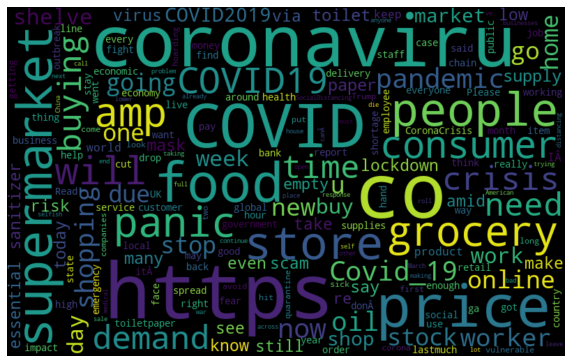

In [82]:
nuvem_negativa(df_3, 'OriginalTweet')

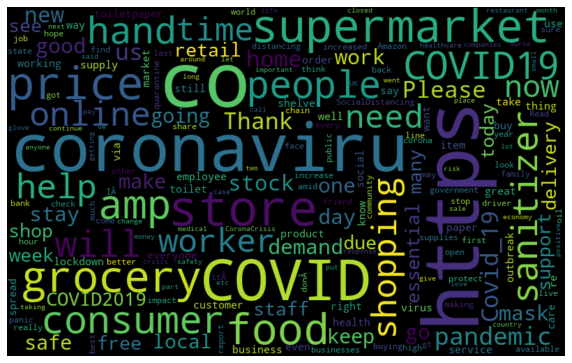

In [83]:
nuvem_positiva(df_3, 'OriginalTweet')

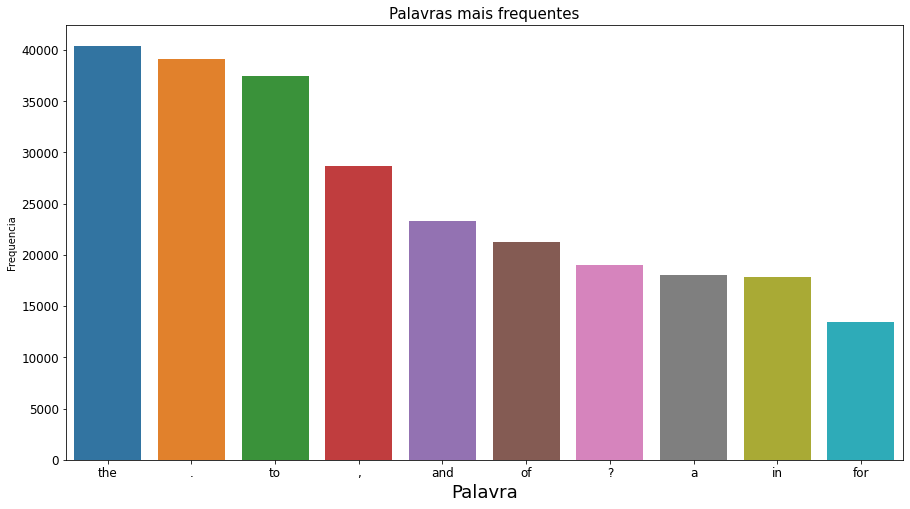

In [85]:
token_mais_frequentes(df_3, 'OriginalTweet', 10)

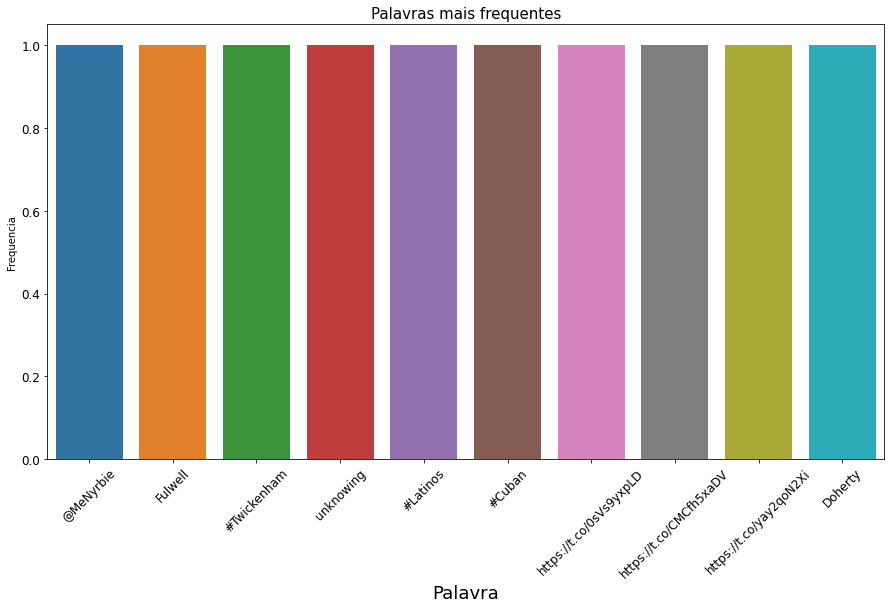

In [88]:
token_menos_frequentes(df_3, 'OriginalTweet', 10)

## 4° Modelo com tratamento mais profundo do tweet
- Removendo pontuação
- Removendo links
- Removendo #

In [151]:
def remover_pontuacao(tweet):
    
    for pontuacao in punctuation:
        tweet = tweet.replace(pontuacao, '')
    
    return tweet

In [152]:
def processar_tweet(tweet):

    token_tweet = TweetTokenizer().tokenize(tweet)
    tweet_processado = []

    for palavra in token_tweet:
        
        tweet = re.sub('@\S+', '', palavra)
        tweet = remover_pontuacao(tweet)

        tweet = re.sub('http\S+', '', tweet)

        tweet_processado.append(tweet)
        #tweet = contractions.fix(tweet

    return ' '.join(tweet_processado)

In [153]:
df_4 = df.copy()

In [154]:
df_4.Sentiment = df_4.Sentiment.map({'Extremely Negative': 0,
                                     'Negative': 0,
                                     'Neutral': 1,
                                     'Positive': 2,
                                     'Extremely Positive': 2})

In [155]:
%%time
df_4['tratamento_4'] = df_4.OriginalTweet.apply(processar_tweet) 

CPU times: user 13.1 s, sys: 30.5 ms, total: 13.2 s
Wall time: 13.2 s


In [156]:
df_4.head()

,OriginalTweet,Sentiment,tratamento_4
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,and and
1,advice Talk to your neighbours family to excha...,2,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,2,Coronavirus Australia Woolworths to give elde...
3,My food stock is not the only one which is emp...,2,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",0,Me ready to go at supermarket during the COVI...


In [157]:
X = df_4.tratamento_4
y = df_4.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=22,
                                                    test_size=0.3,
                                                    stratify=y)

In [158]:
df_4.tratamento_4.apply(lambda x: "#" in x).value_counts()

False    41157
Name: tratamento_4, dtype: int64

In [159]:
pipeline = Pipeline([
    ('cv', CountVectorizer(encoding='latin-1',
                           analyzer='word',
                           stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='liblinear',
                                      penalty='l2',
                                      C=2)),
                     ])

In [160]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      4620
           1       0.73      0.58      0.65      2314
           2       0.79      0.85      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.77      0.74      0.75     12348
weighted avg       0.78      0.78      0.78     12348



In [162]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1     2    All
Real                            
0        3707   249   664   4620
1         442  1337   535   2314
2         558   237  4619   5414
All      4707  1823  5818  12348


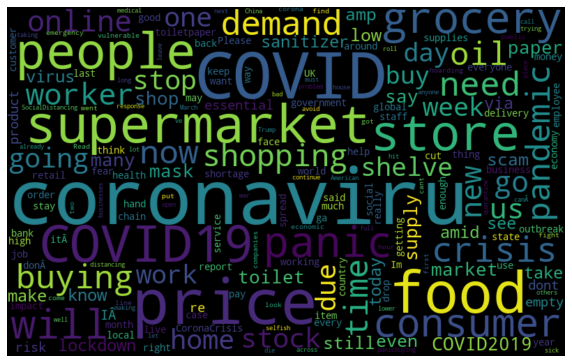

In [133]:
nuvem_negativa(df_4, 'tratamento_4')

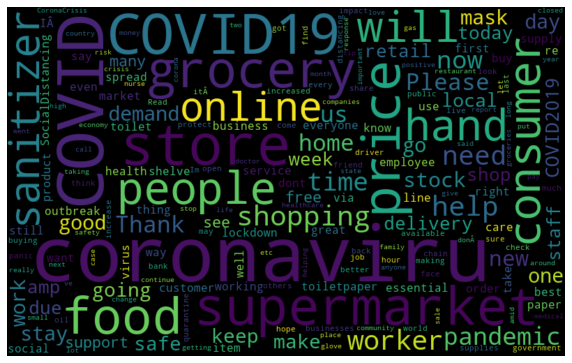

In [134]:
nuvem_positiva(df_4, 'tratamento_4')

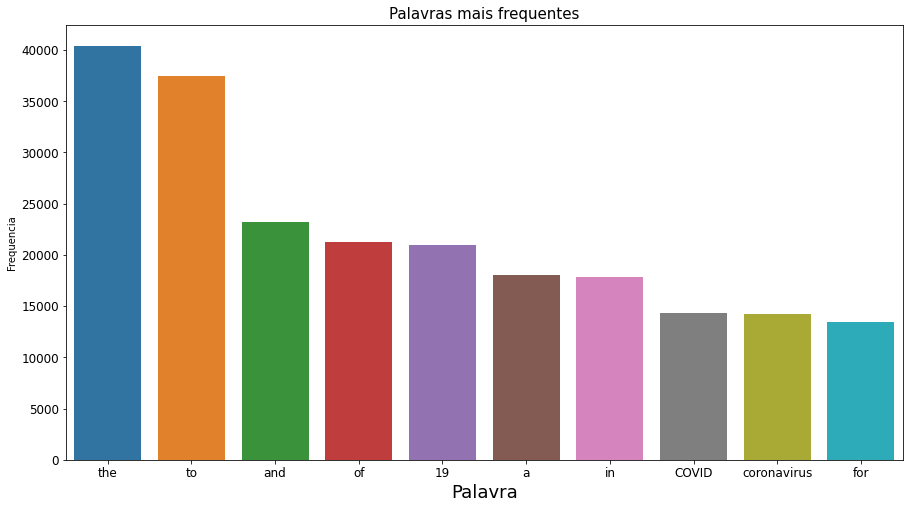

In [135]:
token_mais_frequentes(df_4, 'tratamento_4', 10)

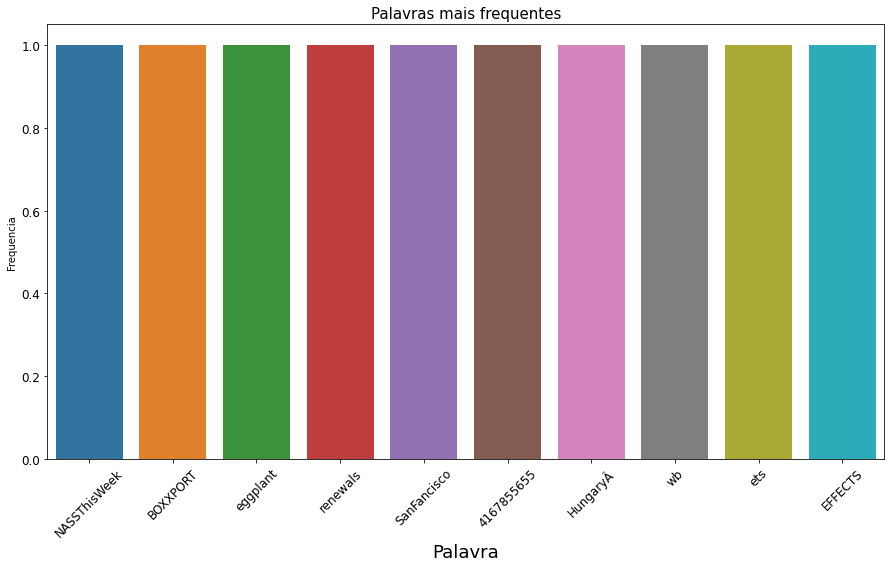

In [136]:
token_menos_frequentes(df_4, 'tratamento_4', 10)

# Conclusão
- A grande mudança na performance foi do modelo de baseline para os demais
- Fora o modelo de baseline os outros modelos mesmo com boas diferenças na pré-processamento do texto a performance foi similar